In [1]:
import pickle

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Setup Data
from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions


%matplotlib inline

In [2]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [3]:
learning_rate_range = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1]
max_depth_range = [2, 5, 7, 9, 11, 13]
n_estimators_range = list(range(75, 175))

In [5]:
grid_search = GridSearchCV(
    xgb.XGBRegressor(),
    param_grid={"learning_rate": learning_rate_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [6]:
grid_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [1e-05, 3e-05, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3], 'max_depth': [2, 5, 7, 9, 11, 13], 'n_estimators': [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 1...155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='n

In [7]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.0003, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=115,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
grid_search.best_score_

-1.0962383932333832

## Visualize Decisions

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/dojo/dimred/pca.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  eig_pairs[i][1] for i in range(self.n_components)


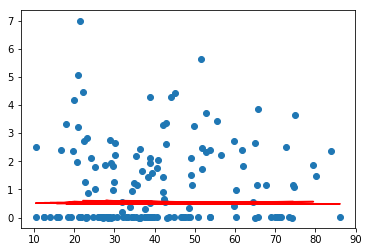

In [9]:
plot_decisions(grid_search.best_estimator_, X, y_log)

## Saving the model

In [10]:
with open("xgboost.b", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)